# Simple 2 class easily separable dataset
We create a simple fake dataset and a simple perceptron classifier, with no hidden layer

/home/yassine/ia_institut/deep_learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


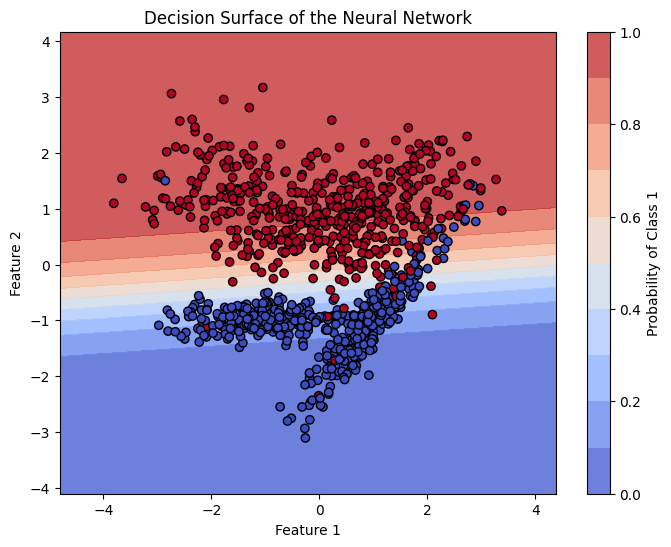

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt


# This creates a fake classification dataset with two classes
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=0)

# Create and train the neural network classifier, it is a fairly simple classifier no hiddent layers
clf = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9, beta_2=0.999, 
                     early_stopping=False, epsilon=1e-08, hidden_layer_sizes=())

clf.fit(X, y)

# Generate a grid of points to plot the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for each point in the grid, purely for plotting purposes
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision surface
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cs = ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap='coolwarm', alpha=0.8)
plt.colorbar(cs, label='Probability of Class 1')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')
ax.set_title('Decision Surface of the Neural Network')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

# XOR problem : cannot be solved with perceptron

Let's try to solve the XOR problem with a perceptron

we create a fake dataset that is not linearly separable and we try to solve it with a perceptron

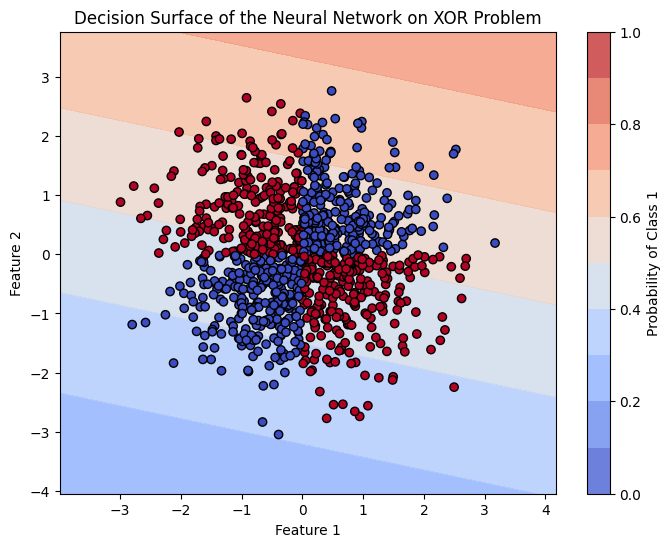

In [ ]:


# Generate XOR problem dataset
def make_xor(number_of_samples=200):
    rng = np.random.RandomState(0)
    X = rng.randn(number_of_samples, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    return X, y

X, y = make_xor(1000)


# Create and train the neural network classifier
clf_no_hidden_layer = MLPClassifier(
    hidden_layer_sizes=(), 
    alpha=0.001, 
    max_iter=1000, 
    solver='adam', 
    random_state=0, 
    activation='relu', 
    early_stopping=False, 
    batch_size=500
)

clf_no_hidden_layer.fit(X, y)

# Generate a grid of points to plot the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for each point in the grid
Z = clf_no_hidden_layer.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision surface
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cs = ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap='coolwarm', alpha=0.8)
plt.colorbar(cs, label='Probability of Class 1')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')
ax.set_title('Decision Surface of the Neural Network on XOR Problem')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

**Not matter how many times you train the perceptron, it will never be able to learn the XOR function**

# With a hidden layer of size 1

/home/yassine/ia_institut/deep_learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


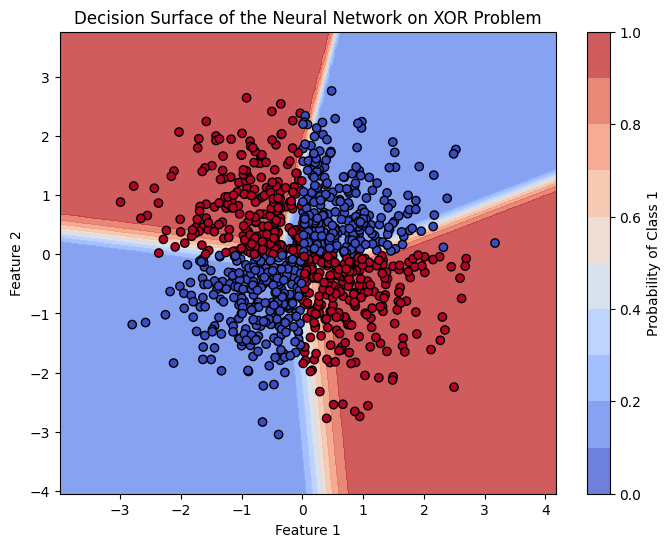

In [51]:
X, y = make_xor(1000)

# Create and train the neural network classifier
clf_with_hidden_layer = MLPClassifier(
    hidden_layer_sizes=(2,2), 
    alpha=0.1, 
    max_iter=500, 
    solver='adam', 
    random_state=0, 
    activation='relu', 
    early_stopping=False, 
    batch_size=100
)

clf_with_hidden_layer.fit(X, y)

# Generate a grid of points to plot the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for each point in the grid
Z = clf_with_hidden_layer.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision surface
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cs = ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap='coolwarm', alpha=0.8)
plt.colorbar(cs, label='Probability of Class 1')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')
ax.set_title('Decision Surface of the Neural Network on XOR Problem')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()